In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

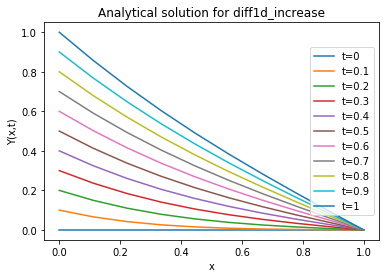

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (adaptive)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.11466762, -0.45824249,  0.15321861, ...,  0.21098447,
         1.3984023 , -2.233604  ],
       [-0.11706655, -0.47684053,  0.14733181, ...,  0.20860012,
         1.39439735, -2.26273345],
       [-0.11459175, -0.46708314,  0.15466847, ...,  0.21112051,
         1.38429867, -2.24045103],
       ...,
       [-0.11158195, -0.45853964,  0.15286668, ...,  0.2194054 ,
         1.3548353 , -2.23047641],
       [-0.11231076, -0.46046937,  0.15153753, ...,  0.21255102,
         1.34366032, -2.21310127],
       [-0.11106172, -0.45311963,  0.14999544, ...,  0.21608061,
         1.35047071, -2.19818095]]), array([1.52331934, 1.52410575, 1.52420543, 1.52427818, 1.52431688,
       1.52461227, 1.52493133, 1.52495164, 1.52508697, 1.52510437,
       1.52528281, 1.52531113, 1.5255529 , 1.52558693, 1.5257326 ,
       1.52618232, 1.52626968, 1.52627357, 1.52629445, 1.5263876 ,
       1.52666485, 1.52666799, 1.526

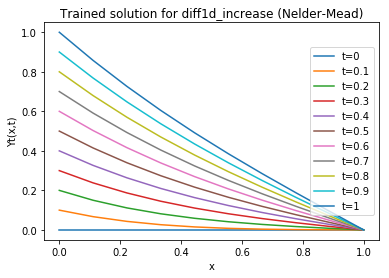

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

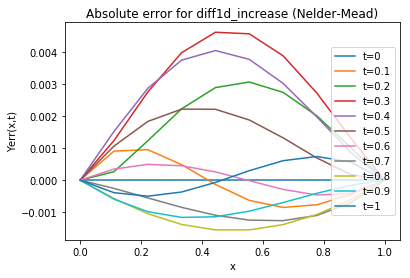

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


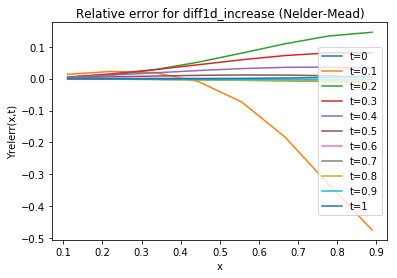

In [9]:
Yt1copy = np.copy(Yt1)
Yacopy = np.copy(Ya)
Yt1sub = Yt1copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr1 = (Yt1sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (adaptive, maxfev=16000)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

4min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.53847439, -1.36352604,  0.49223532, ..., -0.20881343,
         7.18967407, -7.30516691],
       [-0.53857835, -1.36836397,  0.49246698, ..., -0.20765249,
         7.19726836, -7.30984855],
       [-0.53745867, -1.36399403,  0.49280425, ..., -0.20816661,
         7.19348594, -7.31172383],
       ...,
       [-0.53774229, -1.36328255,  0.49377687, ..., -0.20747252,
         7.19595097, -7.2988204 ],
       [-0.53323638, -1.35623652,  0.49343516, ..., -0.20414566,
         7.15638918, -7.25134234],
       [-0.53502476, -1.36085312,  0.49707935, ..., -0.20010163,
         7.18935375, -7.28906022]]), array([1.28307944, 1.28309222, 1.28312046, 1.28312398, 1.28313649,
       1.28314883, 1.28322662, 1.2832308 , 1.28323243, 1.28326669,
       1.283308  , 1.2833371 , 1.28334698, 1.28336345, 1.28336721,
       1.28337053, 1.28337734, 1.28339294, 1.28339411, 1.2833954 ,
       1.28340188, 1.28340684, 1.283

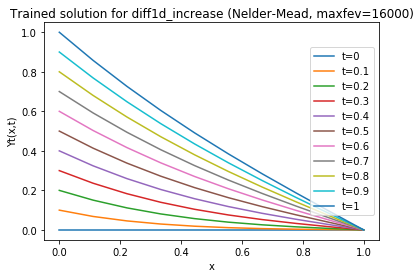

In [11]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

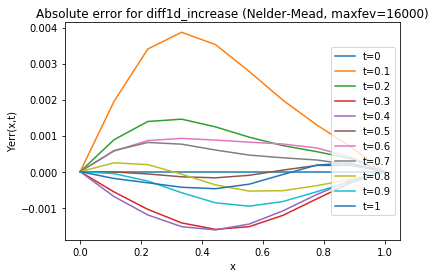

In [12]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


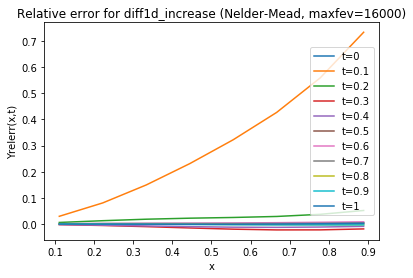

In [13]:
Yt2copy = np.copy(Yt2)
Yacopy = np.copy(Ya)
Yt2sub = Yt2copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr2 = (Yt2sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=32000)

In [14]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

8min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ -0.94481463,  -0.15764725,   0.39545766, ...,  -0.56491007,
         12.4750457 , -12.26313203],
       [ -0.9447992 ,  -0.15757127,   0.39316221, ...,  -0.56200305,
         12.47678189, -12.2754323 ],
       [ -0.94497581,  -0.15989906,   0.395763  , ...,  -0.56622288,
         12.47642641, -12.24903286],
       ...,
       [ -0.94545837,  -0.15725239,   0.39318232, ...,  -0.56290172,
         12.48319069, -12.23595978],
       [ -0.9456959 ,  -0.15844754,   0.38860248, ...,  -0.56433642,
         12.46033958, -12.22199741],
       [ -0.94609695,  -0.15449897,   0.39006678, ...,  -0.56086836,
         12.49449002, -12.24363945]]), array([1.1475216 , 1.14753054, 1.14756666, 1.14756905, 1.1475736 ,
       1.14758223, 1.14758864, 1.14762183, 1.14764868, 1.14766287,
       1.14766697, 1.14767889, 1.14767953, 1.14769242, 1.14769412,
       1.14769818, 1.14770948, 1.14771428, 1.14772002, 1.14772068,

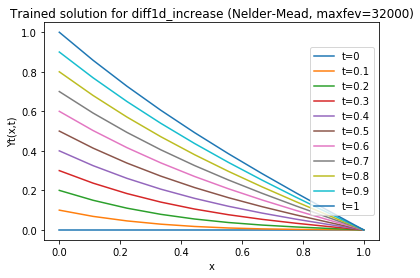

In [15]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

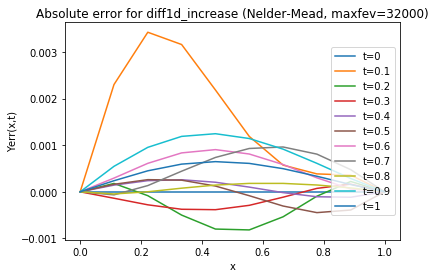

In [16]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


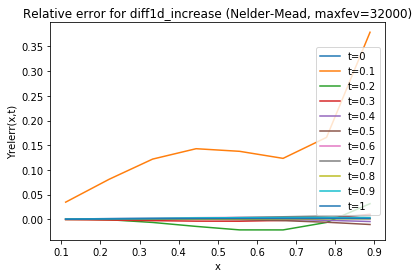

In [17]:
Yt3copy = np.copy(Yt3)
Yacopy = np.copy(Ya)
Yt3sub = Yt3copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr3 = (Yt3sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=64000)

In [18]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 64000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

17min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ -1.06759067,  -0.3847485 ,   0.55180196, ...,  -2.06939387,
         14.83885174, -17.50835893],
       [ -1.0689338 ,  -0.38526188,   0.55107728, ...,  -2.0663598 ,
         14.82507362, -17.50136684],
       [ -1.06815295,  -0.38577522,   0.55215694, ...,  -2.08524131,
         14.85231422, -17.51659811],
       ...,
       [ -1.06947565,  -0.38526877,   0.55396171, ...,  -2.08930745,
         14.88618393, -17.55259043],
       [ -1.06893843,  -0.38697462,   0.5522937 , ...,  -2.069727  ,
         14.84794671, -17.52619155],
       [ -1.06856653,  -0.3859648 ,   0.55085408, ...,  -2.08191709,
         14.86074394, -17.5393873 ]]), array([1.05046606, 1.0504667 , 1.05046687, 1.05046735, 1.05047298,
       1.05047378, 1.05047817, 1.05047822, 1.05047847, 1.05047863,
       1.05047893, 1.05047952, 1.05048142, 1.05048147, 1.05048259,
       1.05048316, 1.05048368, 1.05048378, 1.05048575, 1.05048865

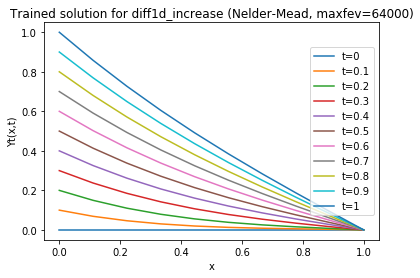

In [19]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

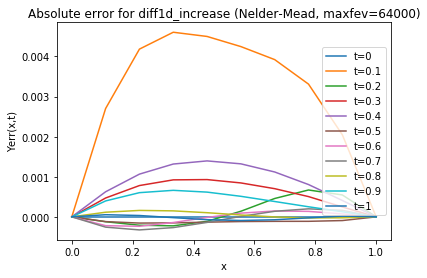

In [20]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


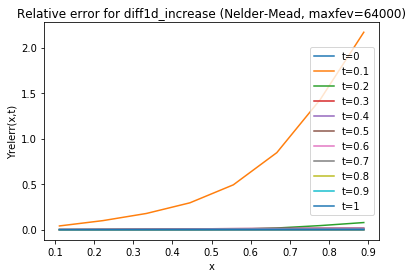

In [21]:
Yt4copy = np.copy(Yt4)
Yacopy = np.copy(Ya)
Yt4sub = Yt4copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr4 = (Yt4sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=128000)

In [22]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 128000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

34min 21s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ -0.07567589,  -0.04045931,   0.32391504, ...,  -0.08055528,
         23.97952994, -30.88187654],
       [ -0.07398175,  -0.04029834,   0.32301716, ...,  -0.08166281,
         23.98566008, -30.8876054 ],
       [ -0.07958822,  -0.0404047 ,   0.3239777 , ...,  -0.08324592,
         23.96448858, -30.84886894],
       ...,
       [ -0.07287698,  -0.04017539,   0.32395026, ...,  -0.08226932,
         23.9769702 , -30.86690939],
       [ -0.07953575,  -0.04029722,   0.32377636, ...,  -0.08144348,
         23.9566298 , -30.84593513],
       [ -0.07473482,  -0.04050378,   0.3262137 , ...,  -0.0816274 ,
         23.95101136, -30.84135769]]), array([1.00679721, 1.0067977 , 1.00679777, 1.0067983 , 1.00679865,
       1.00679881, 1.00679899, 1.00679919, 1.00679939, 1.00679967,
       1.00679969, 1.00680011, 1.00680014, 1.00680043, 1.00680052,
       1.00680073, 1.00680153, 1.00680157, 1.00680196, 1.00680274

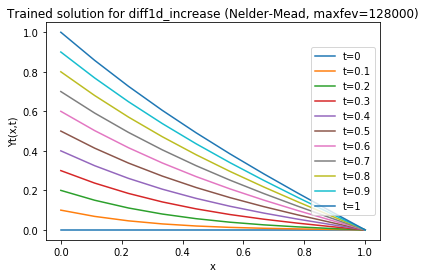

In [23]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

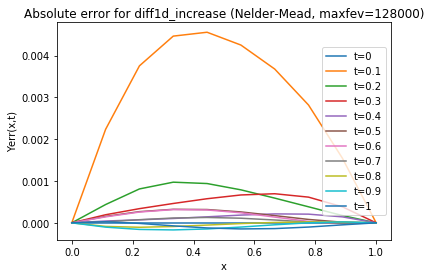

In [24]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


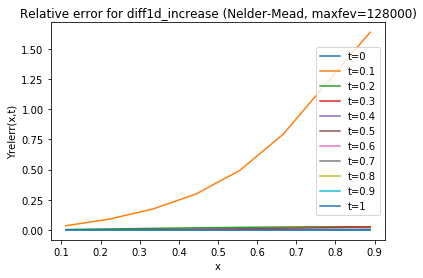

In [25]:
Yt5copy = np.copy(Yt5)
Yacopy = np.copy(Ya)
Yt5sub = Yt5copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr5 = (Yt5sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));